## Histogram

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
score = pd.read_csv('Most-Recent-Cohorts-Scorecard-Elements.csv')

Text(0.5, 0, 'SAT Score')

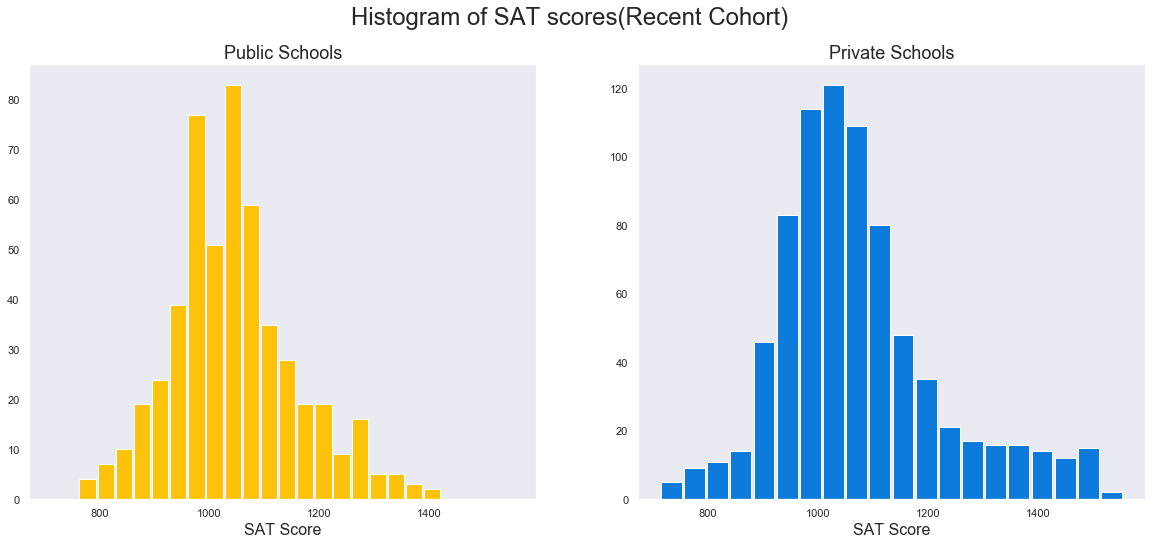

In [6]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt
df = score[['CONTROL', 'SAT_AVG']]
df.dropna(inplace=True)
 
# plot
f, axes = plt.subplots(1, 2, figsize=(20, 8), sharex=True)
f.suptitle("Histogram of SAT scores(Recent Cohort)", fontsize=24)
df[df.CONTROL==1]['SAT_AVG'].hist(grid=False, bins=20, rwidth=0.9,
                   color='#FFC20A',  ax=axes[0])
#  df[df.CONTROL==1]['SAT_AVG'] , color="skyblue", ax=axes[0, 0])
df[df.CONTROL.isin([2,3])]['SAT_AVG'].hist(grid=False, bins=20, rwidth=0.9,
                   color='#0C7BDC',  ax=axes[1])
axes[0].title.set_text('Public Schools')
axes[0].title.set_fontsize(18)
axes[0].set_xlabel('SAT Score', fontsize=16)
axes[1].title.set_text('Private Schools')
axes[1].title.set_fontsize(18)
axes[1].set_xlabel('SAT Score', fontsize=16)



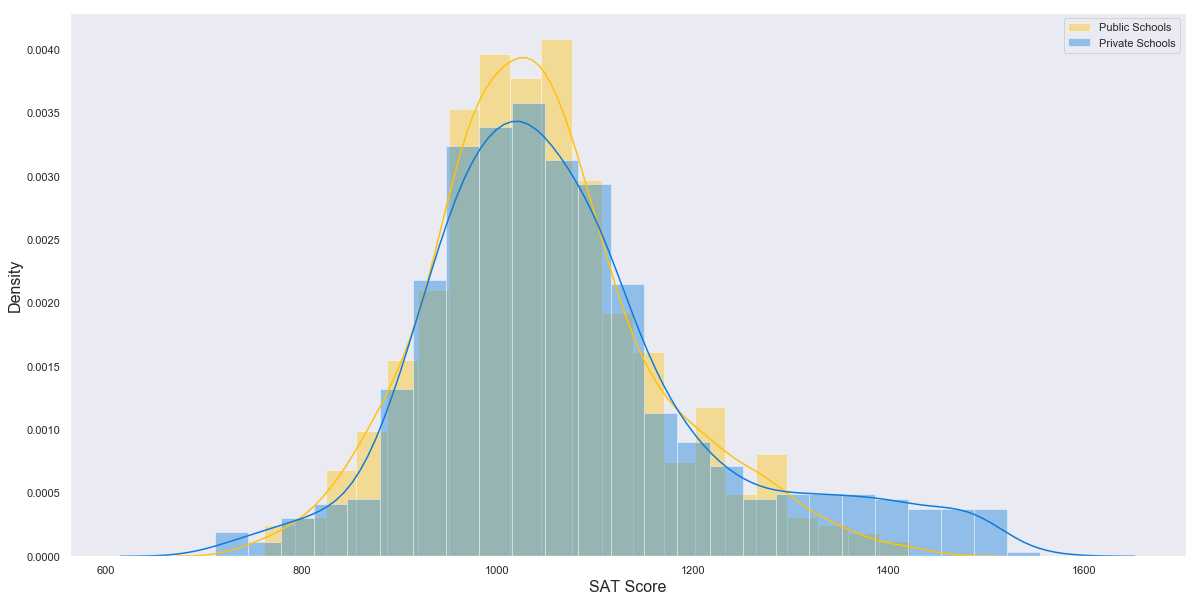

In [5]:
import seaborn as sns
df = df
 
# Method 1: on the same Axis
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot( df[df.CONTROL==1]['SAT_AVG'] , color='#FFC20A', label="Public Schools")
sns.distplot( df[df.CONTROL.isin([2,3])]['SAT_AVG'] , color='#0C7BDC', label="Private Schools")
plt.xlabel("SAT Score", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend()
plt.grid(False)
plt.show()
 


In [9]:
complete = pd.read_csv('Most-Recent-Cohorts-All-Data-Elements.csv')

In [8]:
college_price = complete.groupby('INSTNM').mean()['COSTT4_A']

In [9]:
college_price.sort_values(ascending=False)[:15].reset_index()

,INSTNM,COSTT4_A
0,Aviator College of Aeronautical Science and Te...,85308.0
1,University of Chicago,70100.0
2,Harvey Mudd College,69355.0
3,Columbia University in the City of New York,69021.0
4,Northwestern University,67887.0
5,Drexel University,67821.0
6,Washington University in St Louis,67751.0
7,New York University,67637.0
8,Southern California Institute of Architecture,67225.0
9,University of Southern California,67064.0


## Bar plot

Text(0.5, 1.0, 'Top 15 most expensive colleges in USA(Cost of attendance)')

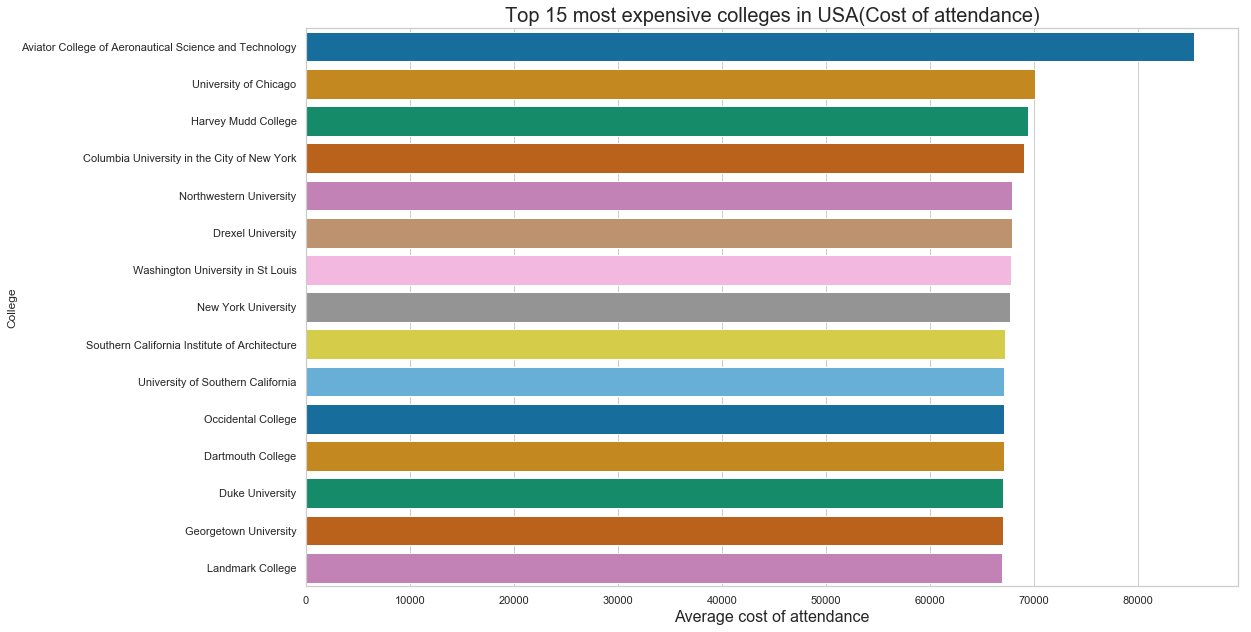

In [154]:
sns.set(style="whitegrid")
a4_dims = (16.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x='COSTT4_A', y="INSTNM", data=college_price.sort_values(ascending=False)[:15].reset_index(),
           palette=sns.color_palette("colorblind", 15))  
plt.xlabel('Average cost of attendance', fontsize=16)
plt.ylabel('College')
plt.title('Top 15 most expensive colleges in USA(Cost of attendance)', fontsize=20)

Text(0.5, 1.0, 'Top 15 least expensive colleges in USA(Cost of attendance)')

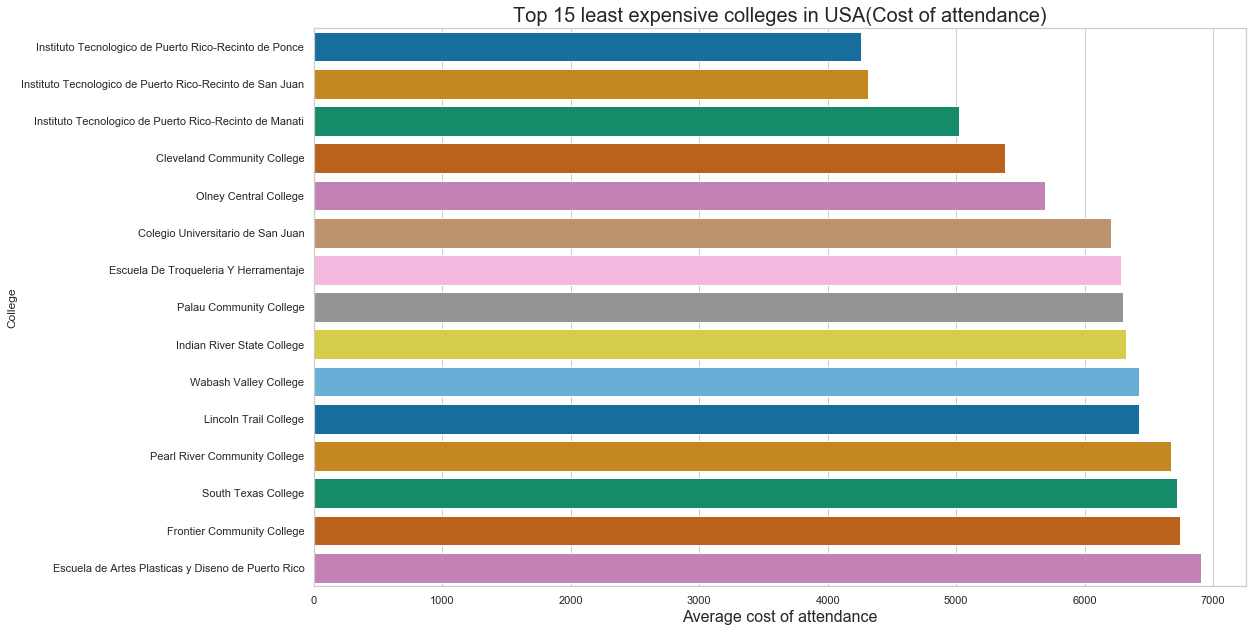

In [155]:
sns.set(style="whitegrid")
a4_dims = (16.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x='COSTT4_A', y="INSTNM", data=college_price.sort_values(ascending=True)[:15].reset_index(),
           palette=sns.color_palette("colorblind", 15))  
plt.xlabel('Average cost of attendance', fontsize=16)
plt.ylabel('College')
plt.title('Top 15 least expensive colleges in USA(Cost of attendance)', fontsize=20)

## Box plot

Text(0, 0.5, 'Cost of attendance ($)')

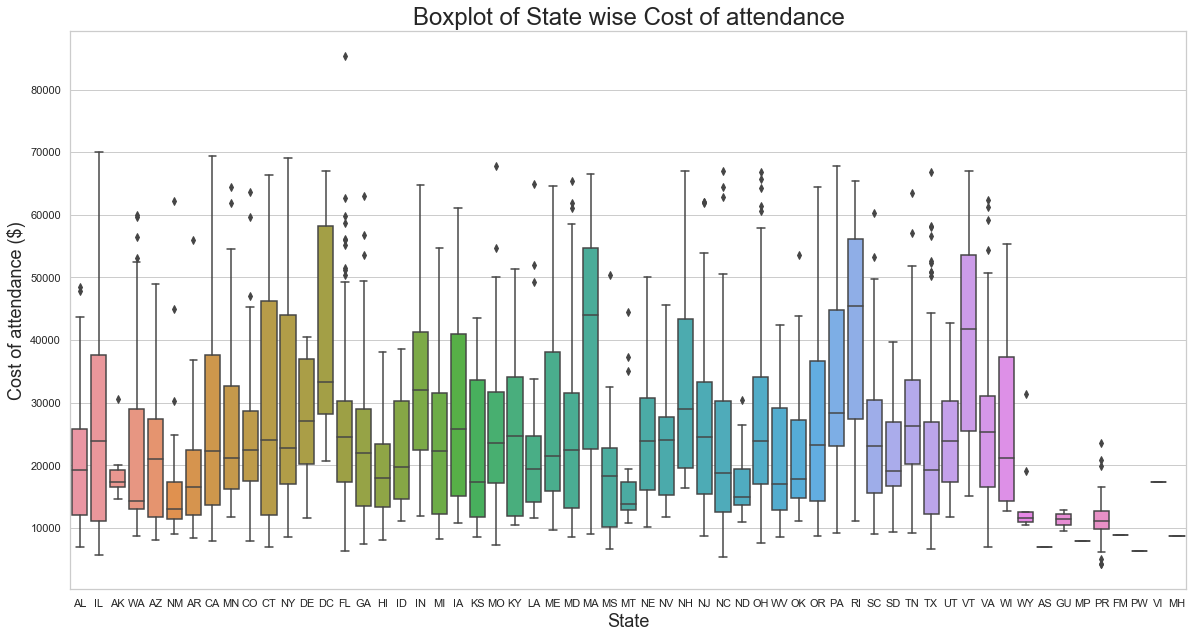

In [174]:
a4_dims = (20, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='STABBR', y='COSTT4_A', data=complete[['STABBR', 'COSTT4_A' ]])
plt.title("Boxplot of State wise Cost of attendance", fontsize=24)
plt.xlabel('State', fontsize=18)
plt.ylabel('Cost of attendance ($)', fontsize=18)


[Text(0, 0, 'Non-degree-granting'),
 Text(0, 0, 'Certificate degree'),
 Text(0, 0, 'Associate degree'),
 Text(0, 0, 'Bachelor degree'),
 Text(0, 0, 'Graduate degree')]

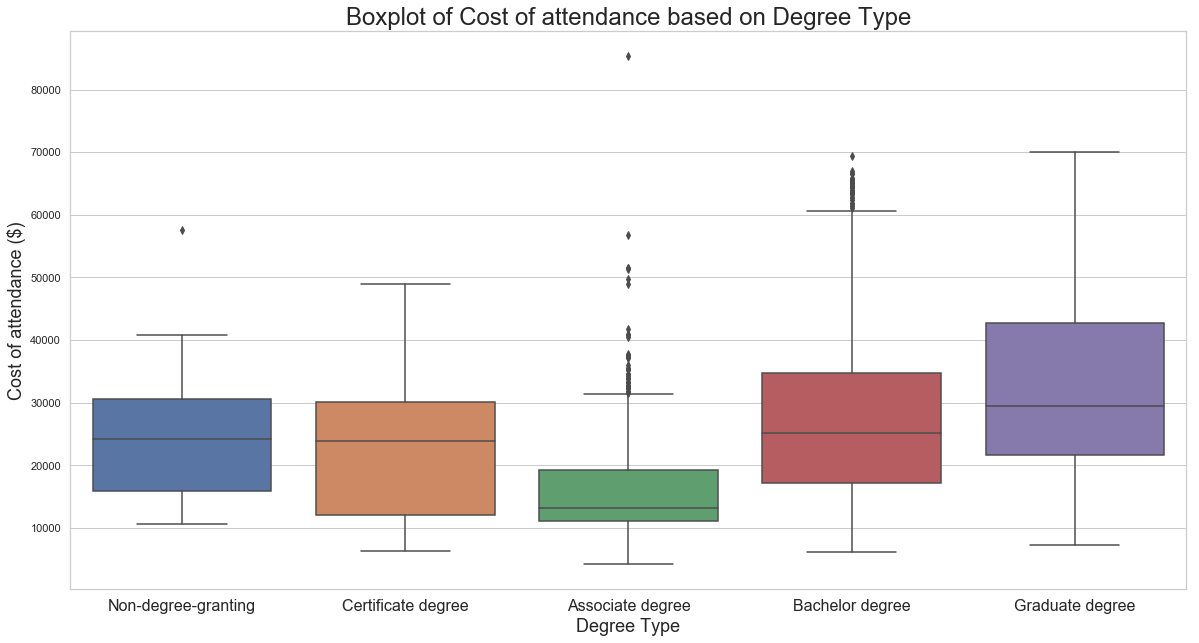

In [193]:
a4_dims = (20, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='HIGHDEG', y='COSTT4_A', data=complete[['HIGHDEG', 'COSTT4_A' ]])
plt.title("Boxplot of Cost of attendance based on Degree Type", fontsize=24)
plt.xlabel('Degree Type', fontsize=18)
plt.ylabel('Cost of attendance ($)', fontsize=18)
ax.set_xticklabels(['Non-degree-granting', 'Certificate degree', 'Associate degree',
'Bachelor degree', 'Graduate degree'], fontsize=16)

## Scatter Plot

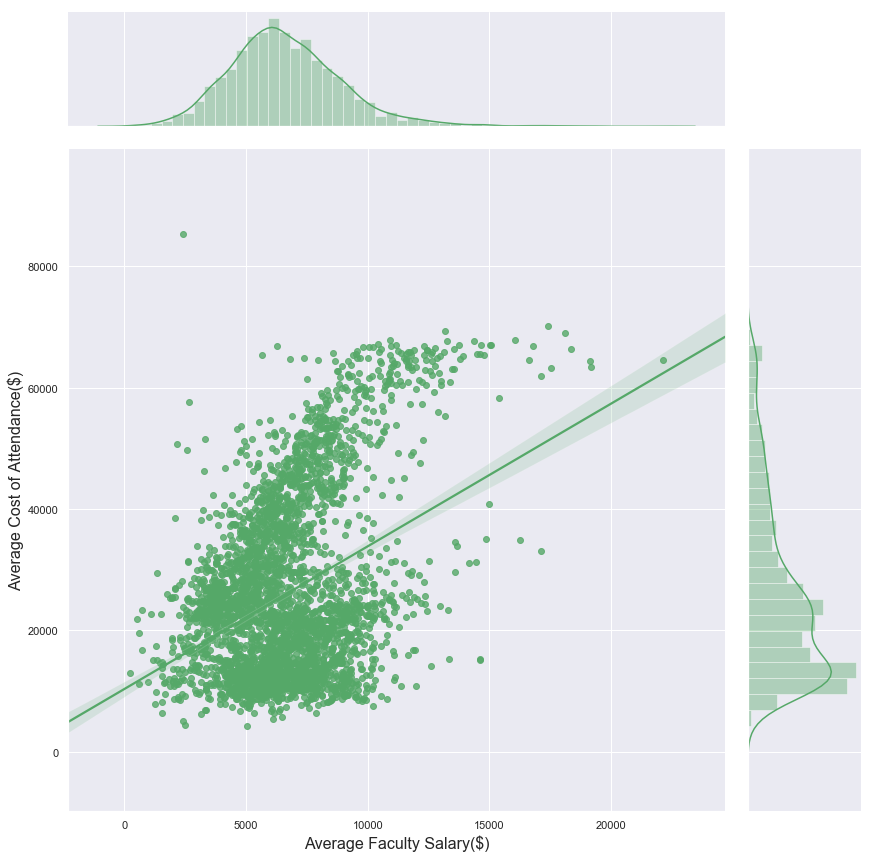

In [232]:
g = sns.jointplot(x=complete['AVGFACSAL'], y=complete['COSTT4_A'],  size=12,
                 kind="reg", color="g")
g.set_axis_labels(xlabel='Average Faculty Salary($)', ylabel='Average Cost of Attendance($)', fontsize=16)


Text(0, 0.5, 'Cost of attendance ($)')

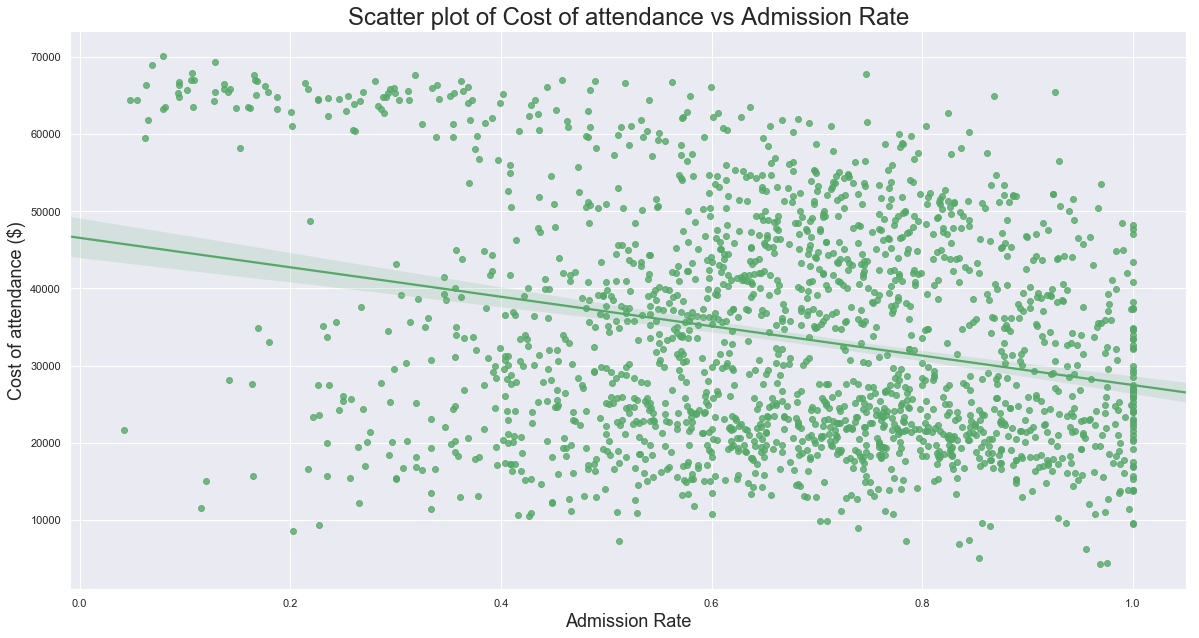

In [241]:
a4_dims = (20, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x=complete['ADM_RATE'], y=complete['COSTT4_A'], color='g')
plt.title("Scatter plot of Cost of attendance vs Admission Rate", fontsize=24)
plt.xlabel('Admission Rate', fontsize=18)
plt.ylabel('Cost of attendance ($)', fontsize=18)


Text(0, 0.5, 'Cost of attendance ($)')

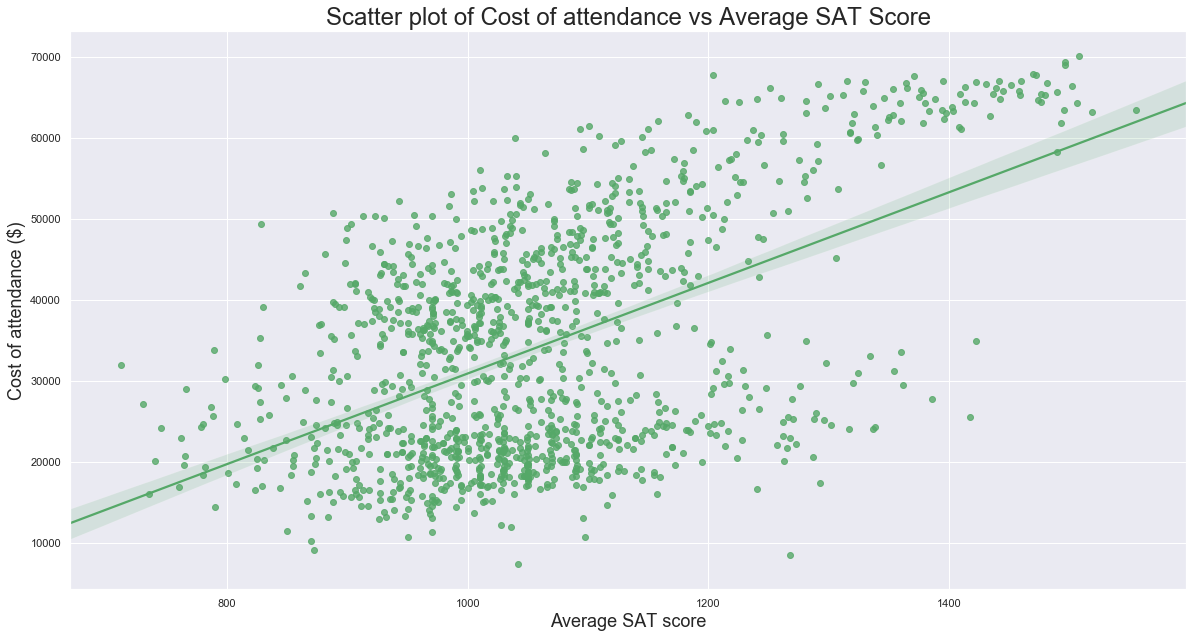

In [244]:
a4_dims = (20, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x=complete['SAT_AVG'], y=complete['COSTT4_A'], color='g')
plt.title("Scatter plot of Cost of attendance vs Average SAT Score", fontsize=24)
plt.xlabel('Average SAT score', fontsize=18)
plt.ylabel('Cost of attendance ($)', fontsize=18)

## Bubble Plot

In [10]:
complete[['SAT_AVG', 'COSTT4_A', 'STABBR']].groupby('STABBR').count()['SAT_AVG']
df_bubble = complete[['SAT_AVG', 'COSTT4_A', 'STABBR']].groupby('STABBR').mean()[['SAT_AVG', 'COSTT4_A']].reset_index()
df_bubble['College_count'] = np.array(complete[['SAT_AVG', 'COSTT4_A', 'STABBR']].groupby('STABBR').count()['SAT_AVG'])

In [11]:
df_bubble.dropna(inplace=True)

In [12]:
df_bubble.head()

,STABBR,SAT_AVG,COSTT4_A,College_count
0,AK,1060.000000,19165.142857,1
1,AL,1030.560000,20365.833333,25
2,AR,1047.000000,18901.180000,18
4,AZ,1082.833333,21058.730769,6
5,CA,1113.859155,27357.503546,71


In [13]:
import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
trace0 = go.Scatter(
    x=df_bubble['SAT_AVG'],
    y=df_bubble['COSTT4_A'],
    text=df_bubble['STABBR'],
    mode='markers',
    marker=dict(
        size=df_bubble['College_count'],
    )
)

data = [trace0]
layout = go.Layout(
    title='Relation between SAT score, Cost of Attendence and Number of Schools',
    xaxis=dict(
        title='Average SAT score',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Average Cost of Attendance($)',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='life-expectancy-per-GDP-2007')
iplot(fig, filename='bubblechart-size')

## Heat map

In [292]:
## Change numbers to names
heat_df = complete[['REGION', 'CONTROL', 'STABBR']].groupby(['REGION', 'CONTROL']).count()[1:].reset_index()

In [309]:
data = [
    go.Heatmap(
        z=heat_df.STABBR,
        x=heat_df.REGION,
        y=heat_df.CONTROL,
        colorscale='Viridis',
    )
]

layout = go.Layout(
    title='Number of Colleges across Regions and Control',
    yaxis={'tickformat': ',d', 
          'title':'College Control'},
    xaxis = {'title':'Region'}
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='datetime-heatmap')

## Stacked area or stream graph

#### Cost of attendance across years based on control type

In [11]:
import os

In [40]:
results = []
for file in os.listdir('CollegeScorecard_Raw_Data/'):
    if '.csv' in file:
        costs = list(pd.read_csv('CollegeScorecard_Raw_Data/'+file)[['CONTROL', 'COSTT4_A']].dropna().groupby('CONTROL').mean()['COSTT4_A'])
        results.append([file.split('D')[1].split('_')[0]]+ costs)
        

In [42]:
costs = [x for x in results if len(x)>2]

In [53]:
cost_year_df = pd.DataFrame(np.array(costs, 'float'),columns=['Year', 'Public', 'Private nonprofit', 'Private for-profit'])

In [56]:
cost_year_df

,Year,Public,Private nonprofit,Private for-profit
0,2011.0,13776.619163,32241.484454,25842.545859
1,2014.0,14919.743051,35607.619628,25902.706404
2,2012.0,14322.836207,33442.437139,25399.297345
3,2009.0,12671.031953,29796.706355,24722.214583
4,2016.0,15458.775990,37704.266667,26272.151745
5,2015.0,15183.979567,36628.740343,26460.697905
6,2013.0,14688.437731,34516.211429,25656.527305
7,2010.0,13253.603751,31130.604091,25019.942885


In [68]:
cost_year_df.sort_values(by='Year', inplace=True)

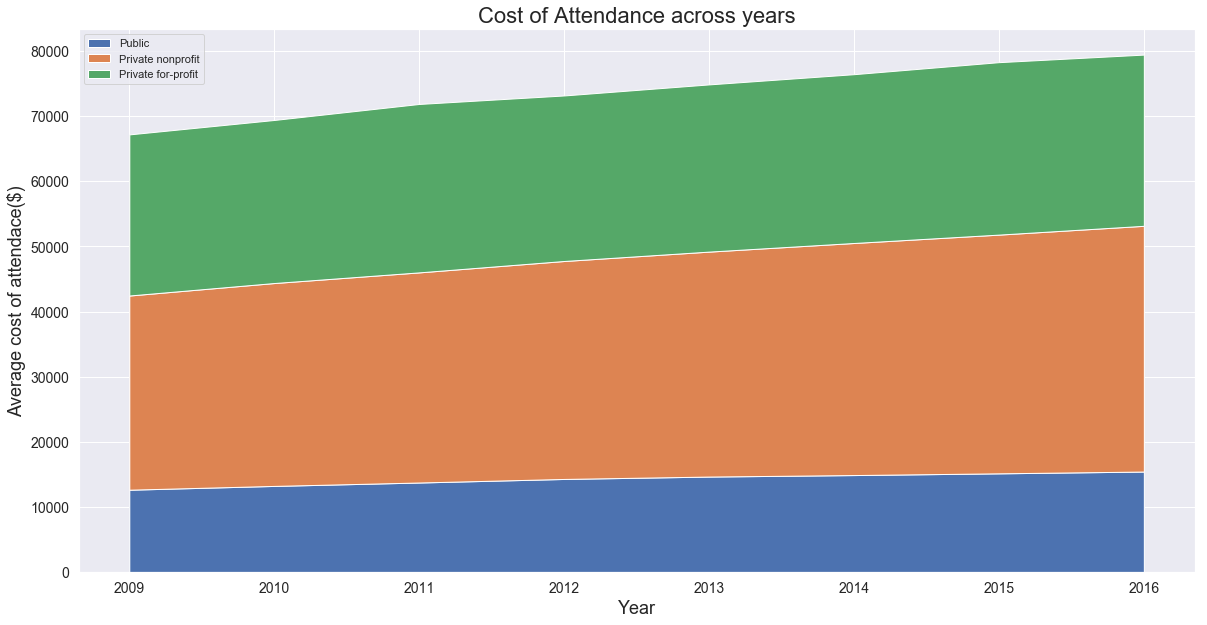

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Data
x=np.array(cost_year_df.Year)
y=np.array([np.array(cost_year_df.iloc[:,1]),np.array(cost_year_df.iloc[:,2]),np.array(cost_year_df.iloc[:,3])])
 
# Plot
plt.stackplot(x,y, labels=['Public','Private nonprofit','Private for-profit'])
plt.legend(loc='upper left')
plt.title("Cost of Attendance across years", fontsize=22)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Average cost of attendace($)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


### Tree map

In [14]:
locale = complete[['LOCALE', 'COSTT4_A']].groupby('LOCALE').mean()[1:].reset_index()

In [15]:
locale.COSTT4_A

0     29280.413181
1     26774.628571
2     24951.962578
3     27866.614267
4     24260.798165
5     22827.263889
6     29392.000000
7     25038.321656
8     20293.789030
9     17804.479839
10    22187.844444
11    19142.978723
Name: COSTT4_A, dtype: float64

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import squarify

x = 0.
y = 0.
width = 200.
height = 200.

values = np.array(locale.COSTT4_A)

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['rgb(100, 100, 100)','rgb(255, 255, 0)','rgb(128, 128, 30)',
                'rgb(100, 255, 50)','rgb(50, 128, 50)','rgb(80, 255, 255)',
               'rgb(0, 128, 128)', 'rgb(100, 100, 255)', 'rgb(100, 100, 128)',
               'rgb(255, 70, 255)','rgb(155, 70, 155)', 'rgb(55, 170, 55)' ]
shapes = []
annotations = []
counter = 0

tags = ['City: Large', 'City: Midsize', 'City: Small', 'Suburb: Large', 'Suburb: Midsize', 
'Suburb: Small', 'Town: Fringe', 'Town: Distant','Town: Remote', 'Rural: Fringe', 'Rural: Distant',
'Rural: Remote'] 

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = tags[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(round(v)) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    title='Local wise average cost of attendance',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False ),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

# Without hovertext
# figure = dict(data=[Scatter()], layout=layout)

iplot(figure, filename='squarify-treemap')